In [9]:
import pandas as pd

# Load the dataset
file_path = 'Dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Head:")
print(data.head())

# Check data types and summary statistics
print(data.info())
print(data.describe())

# Handle missing values
data.dropna(inplace=True)

# Standardize date formats
data['Billing Date'] = pd.to_datetime(data['Billing Date'], errors='coerce')

# Ensure numerical columns are correctly formatted
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

# Remove any remaining rows with invalid data
print(data.dropna(inplace=True))
data.head()

Dataset Head:
   Account ID  Customer Name Billing Date      Amount   Status   Description  \
0        1001   David Wilson   2023-01-01  193.987558  Pending  Consultation   
1        1002  Alice Johnson   2023-01-02  370.656021  Pending      Purchase   
2        1003  Sophia Garcia   2023-01-03  233.019486  Pending      Lab Test   
3        1004   Olivia Davis   2023-01-04  296.120725     Paid     Follow-up   
4        1005   David Wilson   2023-01-05  294.654764     Paid       Therapy   

    Department  
0   Pediatrics  
1  Orthopedics  
2     Pharmacy  
3     Pharmacy  
4          ENT  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Account ID     110 non-null    int64  
 1   Customer Name  110 non-null    object 
 2   Billing Date   110 non-null    object 
 3   Amount         110 non-null    float64
 4   Status         110 non-null   

,Account ID,Customer Name,Billing Date,Amount,Status,Description,Department
0,1001,David Wilson,2023-01-01,193.987558,Pending,Consultation,Pediatrics
1,1002,Alice Johnson,2023-01-02,370.656021,Pending,Purchase,Orthopedics
2,1003,Sophia Garcia,2023-01-03,233.019486,Pending,Lab Test,Pharmacy
3,1004,Olivia Davis,2023-01-04,296.120725,Paid,Follow-up,Pharmacy
4,1005,David Wilson,2023-01-05,294.654764,Paid,Therapy,ENT


In [10]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Identify duplicate transactions
duplicates = data[data.duplicated()]
print("Duplicate Transactions:")
print(duplicates)

# Validate data types and standardize formats
data['Billing Date'] = pd.to_datetime(data['Billing Date'], errors='coerce')
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

# Remove or handle missing/invalid data
data.dropna(inplace=True)

# Removing duplicate transactions
data.drop_duplicates(inplace=True)


Missing Values:
Account ID       0
Customer Name    0
Billing Date     0
Amount           0
Status           0
Description      0
Department       0
dtype: int64
Duplicate Transactions:
Empty DataFrame
Columns: [Account ID, Customer Name, Billing Date, Amount, Status, Description, Department]
Index: []


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate relevant metrics
billing_cycle_times = data.groupby('Account ID')['Billing Date'].apply(lambda x: x.max() - x.min())
payment_discrepancies = data.groupby('Account ID')['Amount'].apply(lambda x: x.max() - x.min())
late_payments = data[data['Status'] == 'Late']
average_payment_amount = data['Amount'].mean()

# Identify unusual patterns
high_cost_transactions = data[data['Amount'] > data['Amount'].quantile(0.95)]
duplicate_transactions = data[data.duplicated(subset=['Account ID', 'Billing Date', 'Amount'])]


print(f"Average Payment Amount: ${average_payment_amount:.2f}")
print(f"High Cost Transactions: {len(high_cost_transactions)}")
print(f"Duplicate Transactions: {len(duplicate_transactions)}")
print(f"Payment Discrepancies: {payment_discrepancies.mean():.2f}")
print(f"Late Payments: {len(late_payments)}")


Average Payment Amount: $479.31
High Cost Transactions: 6
Duplicate Transactions: 0
Payment Discrepancies: 8.52
Late Payments: 0


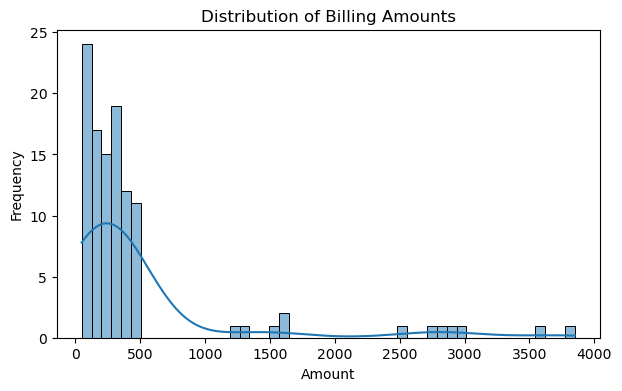

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Billing Amounts
plt.figure(figsize=(7, 4))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Billing Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


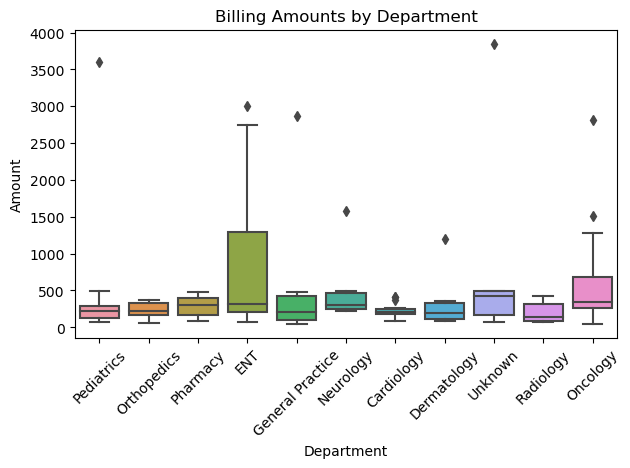

In [13]:
# Boxplot of Billing Amounts by Department
plt.figure(figsize=(7, 4))
sns.boxplot(x='Department', y='Amount', data=data)
plt.title('Billing Amounts by Department')
plt.xlabel('Department')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()


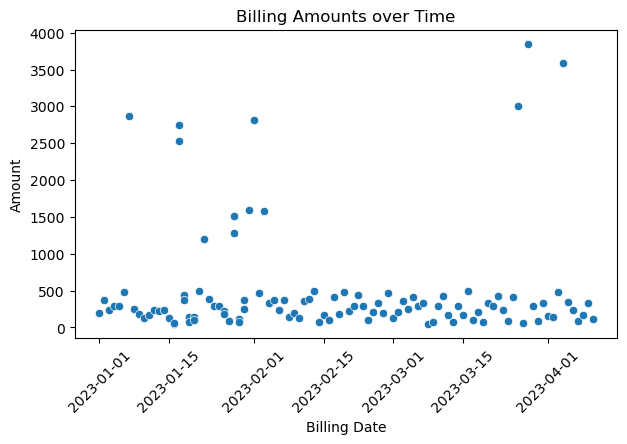

In [14]:
# Scatter Plot of Billing Amounts over Time
plt.figure(figsize=(7, 4))
sns.scatterplot(x='Billing Date', y='Amount', data=data)
plt.title('Billing Amounts over Time')
plt.xlabel('Billing Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()


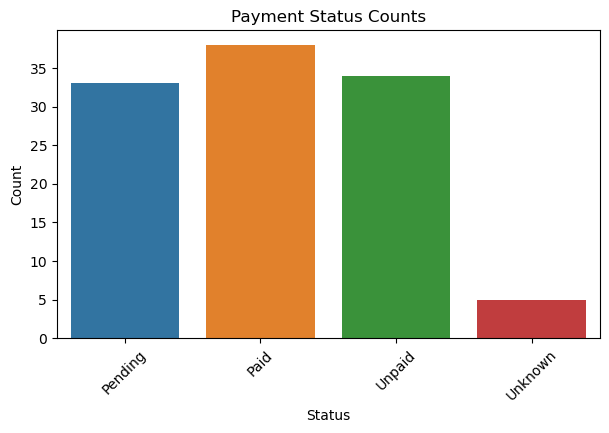

In [15]:
# Bar Plot of Payment Status Counts
plt.figure(figsize=(7, 4))
sns.countplot(x='Status', data=data)
plt.title('Payment Status Counts')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_77/2179585186.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


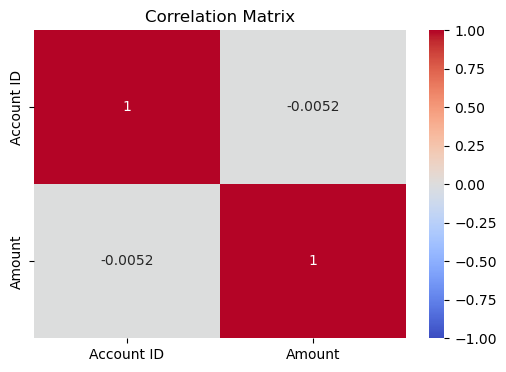

In [16]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(6, 4))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from transformers import pipeline

# Load the dataset
file_path = 'Dataset.csv'
data = pd.read_csv(file_path)

# Data Preparation
data.dropna(inplace=True)
data['Billing Date'] = pd.to_datetime(data['Billing Date'], errors='coerce')
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
data.dropna(inplace=True)

# Data Validation
missing_values = data.isnull().sum()
duplicates = data[data.duplicated()]
data.drop_duplicates(inplace=True)

# Billing Analysis
billing_cycle_times = data.groupby('Account ID')['Billing Date'].apply(lambda x: x.max() - x.min())
payment_discrepancies = data.groupby('Account ID')['Amount'].apply(lambda x: x.max() - x.min())
late_payments = data[data['Status'] == 'Late']
average_payment_amount = data['Amount'].mean()
high_cost_transactions = data[data['Amount'] > data['Amount'].quantile(0.95)]
duplicate_transactions = data[data.duplicated(subset=['Account ID', 'Billing Date', 'Amount'])]

# Generate Visualizations
plt.figure(figsize=(7, 4))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Billing Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.savefig('billing_amount_distribution.png')

plt.figure(figsize=(7, 4))
sns.boxplot(x='Department', y='Amount', data=data)
plt.title('Billing Amounts by Department')
plt.xlabel('Department')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.savefig('billing_amounts_by_department.png')

plt.figure(figsize=(7, 4))
sns.scatterplot(x='Billing Date', y='Amount', data=data)
plt.title('Billing Amounts over Time')
plt.xlabel('Billing Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.savefig('billing_amounts_over_time.png')

plt.figure(figsize=(7, 4))
sns.countplot(x='Status', data=data)
plt.title('Payment Status Counts')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('payment_status_counts.png')

plt.figure(figsize=(6, 4))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')

# Generate Insights and Report using LLM
summary_text = f"""
### Billing Data Analysis Report

**Report Date:** {datetime.now().strftime("%Y-%m-%d")}

#### Key Insights:

1. **Average Payment Amount:**
   The average payment amount in the billing data is ${average_payment_amount:.2f}.

2. **High-Cost Transactions:**
   There are {len(high_cost_transactions)} high-cost transactions (top 5% of amounts).

3. **Duplicate Transactions:**
   There are {len(duplicate_transactions)} duplicate transactions identified.

4. **Payment Discrepancies:**
   The average payment discrepancy across accounts is ${payment_discrepancies.mean():.2f}.

5. **Late Payments:**
   There are {len(late_payments)} late payments recorded.

6. **Billing Cycle Times:**
   The average billing cycle time is {billing_cycle_times.mean().days} days.

#### Visualizations:
1. Distribution of Billing Amounts
   ![Distribution of Billing Amounts](billing_amount_distribution.png)
   
2. Billing Amounts by Department
   ![Billing Amounts by Department](billing_amounts_by_department.png)
   
3. Billing Amounts over Time
   ![Billing Amounts over Time](billing_amounts_over_time.png)
   
4. Payment Status Counts
   ![Payment Status Counts](payment_status_counts.png)
   
5. Correlation Matrix
   ![Correlation Matrix](correlation_matrix.png)

**Overall Analysis:**

The billing data indicates a generally efficient process with some areas requiring attention. The high number of late payments and duplicate transactions suggests the need for stricter validation and timely follow-ups. The payment discrepancies and high-cost transactions provide insights into possible outliers and areas for cost optimization.

Automating the billing analysis process ensures timely identification of discrepancies and patterns, enabling prompt corrective actions and enhanced financial management.

---
"""

# Load the language model for summarization
summarizer = pipeline("summarization")

# Summarize the detailed insights
insights_summary = summarizer(summary_text, max_length=512, min_length=100, do_sample=False)

# Generate Final Report
final_report = summary_text + "\n\n**Summary:**\n" + insights_summary[0]['summary_text']

# Save report to a text file
with open('billing_report.txt', 'w') as file:
    file.write(final_report)

print("Billing report generated and saved as 'billing_report.txt'.")
